## Caso de Estudio: Movielens

Movielens es una conjunto de datos de películas creada por la Universidad de Minnesota.

Los datos se pueden descargar en el siguiente enlace:
* http://grouplens.org/datasets/movielens/20m/

El conjunto de datos *MovieLens 20M Dataset* contiene:
* 20 millones de evaluaciones de peliculas (ratings.csv)
* 465.000 tags (tags.csv)
* 27.000 películas (movies.csv)
* 138.000 usuarios

Una vez completada la descarga debe descomprimir el fichero ml-20m.zip en el directorio datasets y renombrar el subdirectorio como movielens (../datasets/movielens)

In [2]:
import pandas as pd
import numpy as np

Importar los Datos con *Pandas*.

Vamos a trabajar con 3 ficheros CSV:
* **movies.csv :** *movieId*, *title*, *genres*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*

Timestamp (**Unix Time**) es el número de segundos transcurridos desde el 1 de Enero de 1970.


In [3]:
pwd

'C:\\Users\\MJ\\Documents\\python\\aprendiz-data-science-master\\notebooks'

In [4]:
ls "../datasets/movielens"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 56F5-BD97

 Directorio de C:\Users\MJ\Documents\python\aprendiz-data-science-master\datasets\movielens

21/05/2019  15:05    <DIR>          .
21/05/2019  15:05    <DIR>          ..
10/05/2019  09:41       323.544.381 genome-scores.csv
10/05/2019  09:41            18.103 genome-tags.csv
10/05/2019  09:41                 1 intro
10/05/2019  09:41           570.090 links.csv
10/05/2019  09:41         1.397.542 movies.csv
10/05/2019  09:41       533.444.411 ratings.csv
10/05/2019  09:41            10.261 README.txt
10/05/2019  09:42        16.603.996 tags.csv
               8 archivos    875.588.785 bytes
               2 dirs  39.176.908.800 bytes libres


In [33]:
movies = pd.read_csv('../datasets/movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
tags = pd.read_csv('../datasets/movielens/tags.csv', sep=',')
tags.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [35]:
ratings = pd.read_csv('../datasets/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [36]:
# Borraremos la columna timestamp para el análisis inicial
del ratings['timestamp']
del tags['timestamp']

## Data Structures

In [37]:
ratings.tail()

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


### Series

In [10]:
# Extraer la Fila 0 con la función iloc y numero de fila

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [11]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [12]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [13]:
row_0['userId']

18

In [14]:
'tag' in row_0

True

In [15]:
row_0.name

0

In [16]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [17]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


### DataFrames

In [18]:
tags.head(8)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
5,65,668,bollywood
6,65,898,screwball comedy
7,65,1248,noir thriller


In [19]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [20]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [21]:
# Extraer varias filas: Fila 0, 11 y 2000

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


### Estadística Descriptiva

Vamos a describir las características de este conjunto de datos mediante medidas resumen, tablas o gráficos.

In [22]:
# rating['rating'].describe() sobre una columna en concreto
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [23]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,20000263.0,69045.872583,40038.626653,1.0,34395.0,69141.0,103637.0,138493.0
movieId,20000263.0,9041.567330,19789.477445,1.0,902.0,2167.0,4770.0,131262.0
rating,20000263.0,3.525529,1.051989,0.5,3.0,3.5,4.0,5.0


In [24]:
ratings['rating'].mean()

3.5255285642993797

In [25]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [26]:
ratings['rating'].min()

0.5

In [27]:
ratings['rating'].max()

5.0

In [28]:
ratings['rating'].std()

1.051988919275684

In [29]:
#funcion moda, valor más repetido o comun
ratings['rating'].mode()

0    4.0
dtype: float64

In [30]:
# El cálculo de la Correlación no tiene sentido en este Dataset
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [31]:
filter_1 = ratings['rating'] > 5
filter_1
filter_1.any()
# pregunto si existe algun valor que cumpla el filtro

False

In [32]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

### Limpieza de los datos: gestionando datos inexistentes

In [33]:
movies.shape

(27278, 3)

In [34]:
movies.iloc[0]

movieId                                              1
title                                 Toy Story (1995)
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: 0, dtype: object

In [35]:
#buscamos valores nulos
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [36]:
ratings.shape
#ratings.columns

(20000263, 3)

In [37]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [38]:
tags.shape
#tags.columns

(465564, 3)

In [39]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [40]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [41]:
# Eliminar valores nulos en tags
tags = tags.dropna()

In [42]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [43]:
tags.shape

(465548, 3)

### Visualización de Datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029301898C50>]],
      dtype=object)

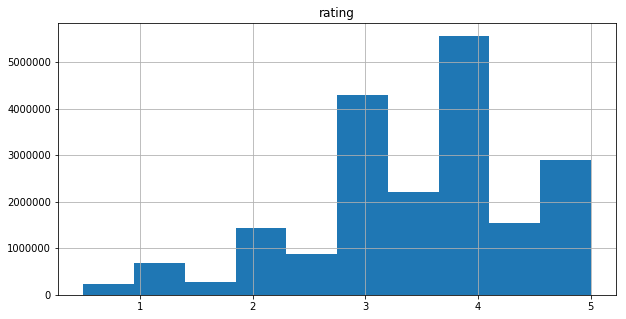

In [49]:
# le decimos a jupiter que integre los gráficos de la libreria matplotlib
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

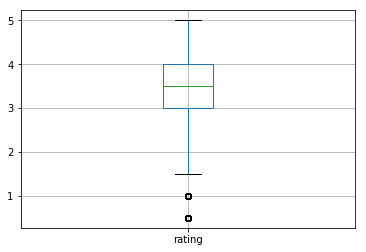

In [45]:
ratings.boxplot(column='rating')

In [46]:
ratings['rating'].describe().transpose()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Selección de Datos
 

In [47]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [48]:
# [] para varias columnas, passar un array de nombres de columnas 
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [49]:
# muestra las 5 ultimas filas  igual ratings.tail5)
ratings[-5:]

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [50]:
ratings.tail(5)

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [51]:
tag_counts = tags['tag'].value_counts()
tag_counts[:20]

sci-fi                3384
based on a book       3281
atmospheric           2917
comedy                2779
action                2657
surreal               2427
BD-R                  2334
twist ending          2323
funny                 2072
dystopia              1991
stylized              1941
quirky                1906
dark comedy           1899
classic               1769
psychology            1754
fantasy               1703
time travel           1549
romance               1534
visually appealing    1509
disturbing            1487
Name: tag, dtype: int64

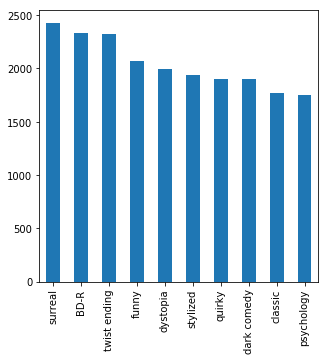

In [52]:
# las funciones de visualización son de pandas la que estamos utilizando
tag_counts[5:15].plot(kind='bar', figsize=(5,5))

### Filtrado de Datos (selección de filas)

In [53]:
#defino el filtro y lo aplico

is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [54]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
# seleccionamos peliculas mediante filtros
is_animation = movies['genres'].str.contains('Animation')
is_adventure = movies['genres'].str.contains('Adventure')
movies[is_animation]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [56]:
# str es el modulo de string que contine la funcion contains, selecciono las peliculas de animación 
is_animation = movies['genres'].str.contains('Animation')

In [57]:
is_adventure = movies['genres'].str.contains('Adventure')
movies[is_adventure][5:15]

,movieId,title,genres
14,15,Cutthroat Island (1995),Action|Adventure|Romance
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
32,33,Wings of Courage (1995),Adventure|Romance|IMAX
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
52,53,Lamerica (1994),Adventure|Drama
55,56,Kids of the Round Table (1995),Adventure|Children|Fantasy
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
85,86,White Squall (1996),Action|Adventure|Drama
93,95,Broken Arrow (1996),Action|Adventure|Thriller
99,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance


In [58]:
movies[is_animation & is_adventure].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


### Agrupación y Agregación de Datos

In [59]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [60]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [61]:
type(ratings_count)

pandas.core.frame.DataFrame

In [62]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [63]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [64]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [65]:
movie_new = ratings[['movieId', 'rating']].groupby('movieId').agg({'rating':np.mean, 'movieId': np.size})
movie_new.head(10)

,rating,movieId
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161
6,3.834930,23899
7,3.366484,12961
8,3.142049,1415
9,3.004924,3960


In [66]:
movie_new = ratings.groupby(['movieId', 'rating']).agg({'rating': [np.mean, np.size]})

In [67]:
movie_new.head()

rating        
                 mean    size
movieId rating               
1       0.5       0.5   178.0
        1.0       1.0   506.0
        1.5       1.5   266.0
        2.0       2.0  1440.0
        2.5       2.5  1060.0

### Combinación de Dataframes

In [68]:
print(tags.count())
tags.head()

userId     465548
movieId    465548
tag        465548
dtype: int64


,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [69]:
print(movies.count())
movies.head()

movieId    27278
title      27278
genres     27278
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
t = movies.merge(tags, on='movieId')
t.head()


,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


Otros Ejemplos: http://pandas.pydata.org/pandas-docs/stable/merging.html

### Análisis de Datos combinando Agregación, Combinación y Filtrado

In [71]:
# li diem que movieid no es un index, afegira l'index del dataframe
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
print(avg_ratings.count())
avg_ratings.head()

movieId    26744
rating     26744
dtype: int64


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


movieId    26744
rating     26744
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002230E996C50>]],
      dtype=object)

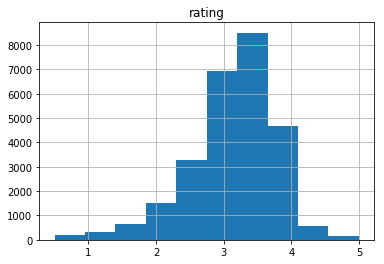

In [72]:
print(avg_ratings.count())
avg_ratings.hist('rating')

In [73]:
print(movies.count())
movies.head()

movieId    27278
title      27278
genres     27278
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [74]:
print(avg_ratings.count())
avg_ratings.head()

movieId    26744
rating     26744
dtype: int64


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [76]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [77]:
is_highly_rated = box_office['rating'] >= 4.0
box_office.count()

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [78]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

### Operaciones con Strings

In [ ]:
movies.head()

### Dividir Generos en múltiples columnas

In [79]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [80]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


### Añadir una columna para indicar si la película es una Comedia

In [81]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [82]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


### Extraer el Año del Título de la película

In [83]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
type(movies['title'])

In [ ]:
#movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [44]:
# movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

movies['year'] = movies['title'].str.extract('.*\(([0-9]+)\).*', expand=True)

In [85]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


Más operaciones con Strings:


http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

### Analizando Fechas en formato Unix

La fecha en formato Unix es muy utilizada en IoT (datos de sensores y otras series temporales)

In [3]:
tags = pd.read_csv('../datasets/movielens/tags.csv', sep=',')

In [18]:
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp               int64
parsed_time    datetime64[ns]
dtype: object

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [6]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [7]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [28]:
pd.to_datetime(tags['timestamp'], unit='s')
#pd.to_datetime([1, 2, 3], unit='s', origin=pd.Timestamp('1969-01-01'))

DatetimeIndex(['1969-01-01 00:00:01', '1969-01-01 00:00:02',
               '1969-01-01 00:00:03'],
              dtype='datetime64[ns]', freq=None)

In [29]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


### Selección de filas filtrando por fecha

In [30]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

selected_rows.head()

#tags.shape, selected_rows.shape

,userId,movieId,tag,timestamp,parsed_time
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03


### Ordenación de filas por fecha

In [31]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


## Analizando la calificación de las películas en función del año

In [41]:
average_rating = ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [46]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [47]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[-20:]

,year,rating
98,1996,3.117377
99,1997,3.055932
100,1998,3.054015
101,1999,3.072774
102,2000,3.074608
103,2001,3.085092
104,2002,3.075135
105,2003,3.127879
106,2004,3.171965
107,2005,3.103949


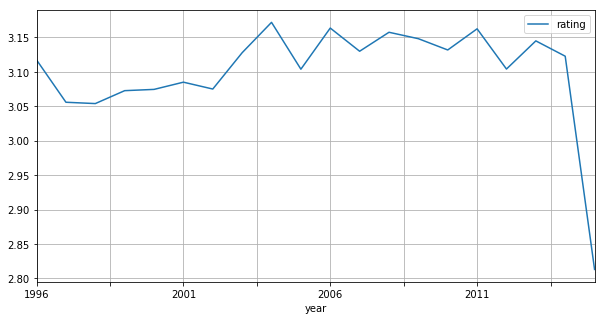

In [50]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(10,5), grid=True)

In [53]:
yearly_average[yearly_average['year'].str.contains('2009')]
#yearly_average[yearly_average['year'] =='2009']


,year,rating
111,2009,3.148238


In [54]:
err_movies = movies['year'].str.contains('2009–')
err_movies.any()

False

In [55]:
movies[err_movies == True]

,movieId,title,genres,year


In [ ]:
ratings.head()

In [56]:
ratings[ratings['movieId'] == 107434]

,userId,movieId,rating
8833091,61050,107434,5.0
